In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import csv 
import math

def load_set():
    with open('heart.csv', 'r') as fin:
      data = fin.read().splitlines(True)
    data = data[1:] #remove the header row 
    numpy_array = np.loadtxt(data, delimiter=",")
    numpy_array_transpose = numpy_array.T 
    m_train = math.ceil (0.8 * numpy_array_transpose.shape[1])
    train_set_x_orig = numpy_array_transpose[0:numpy_array_transpose.shape[0]-1,0:m_train]
    train_set_y_orig = numpy_array_transpose[numpy_array_transpose.shape[0]-1:numpy_array_transpose.shape[0],0:m_train]
    test_set_x_orig = numpy_array_transpose [0:numpy_array_transpose.shape[0]-1, m_train:numpy_array_transpose.shape[1]]
    test_set_y_orig = numpy_array_transpose[numpy_array_transpose.shape[0]-1 : numpy_array_transpose.shape[0],m_train:numpy_array_transpose.shape[1]]
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    return s   

In [3]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [4]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)

    # compute activation 
    A = sigmoid(np.dot(X.T,w) + b)          
    #print(A)
    cost = -(1/m) * np.sum(Y.T * np.log(A) + (1 - Y.T) * (np.log(1-A)) )                                 # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    
    dw = (1/m) * np.dot(X,(A-Y.T))

    db = (1/m) * np.sum(A-Y.T)
    
    ### END CODE HERE ###
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [5]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [6]:

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(X.T,w) + b)
    ### END CODE HERE ###
    #print(range(A.shape[1]))
    for i in range(A.shape[0]):        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        #pass
        if(A[i,0] > 0.5):
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
        ### END CODE HERE ###
        
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [7]:
def normalize(X_train,X_test):
    for i in range(X_train.shape[0]):  
      X_train[i,:] = X_train[i,:] / np.max(X_train[i,:])  
    for i in range(X_test.shape[0]):  
      X_test[i,:] = X_test[i,:] / np.max(X_test[i,:])
    return X_train , X_test          

train accuracy: 87.1951219512195 %
test accuracy: 80.0 %


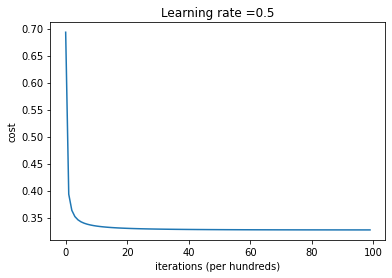

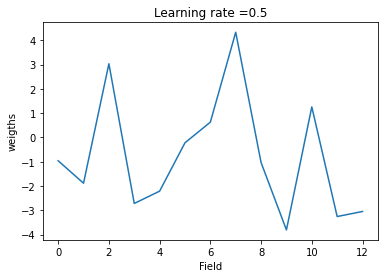

In [8]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)

    w, b = initialize_with_zeros(X_train.shape[0])
    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w,b, X_test)
    Y_prediction_train = predict(w,b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

train_set_x, train_set_y, test_set_x, test_set_y= load_set()
train_set_x , test_set_x = normalize(train_set_x,test_set_x)
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 10000, learning_rate = 0.5, print_cost = False)
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()
#now plotting the optimum weights
plt.plot(d['w'])
plt.ylabel('weigths')
plt.xlabel('Field')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()



From weights plot, we can see which data fields dominates the most for example fields number 2,7,9,10 which are sex , restecg , exang and oldpeak respectively.
 

Increasing the number of iterations increases the training accuracy untill we reach a saturated training accuracy and starting from that convergence point increasing number of iterations will not reduce the cost and will be just a waste of resources 

learning rate is: 3
train accuracy: 87.1951219512195 %
test accuracy: 80.0 %

-------------------------------------------------------

learning rate is: 2
train accuracy: 87.1951219512195 %
test accuracy: 80.0 %

-------------------------------------------------------

learning rate is: 1
train accuracy: 86.82926829268293 %
test accuracy: 80.48780487804878 %

-------------------------------------------------------

learning rate is: 0.5
train accuracy: 86.46341463414635 %
test accuracy: 80.48780487804878 %

-------------------------------------------------------

learning rate is: 0.1
train accuracy: 86.21951219512195 %
test accuracy: 79.51219512195122 %

-------------------------------------------------------

learning rate is: 0.01
train accuracy: 82.5609756097561 %
test accuracy: 77.07317073170731 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 79.39024390243902 %
test accuracy: 77.07317073170731 %

--------------------------------

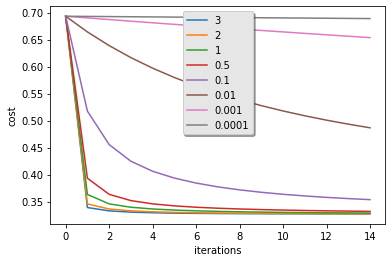

In [9]:
learning_rates = [3,2,1,0.5,0.1,0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

From plots above we can deduce that for same number of iterations, having large learning rate can make the network reach the convergence point much faster i.e. cost curve has much bigger negative slope.
Also, as we can notice in our example increasing the learning rate much more can reduce the test accuracy and does not reduce the cost. So, we can say that learning rate around 0.5 is our optimum here. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is critical paramter for tunning the network 

Having multiple neurons while maintaining same number of iterations and learning rate can reduce the cost but in our example we used only single neuron.
